## bolo versias viwert bibliotekis

In [9]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

In [10]:
from fastai.vision.all import *

## viwert lavis da zgvis fotoebs 

In [11]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

# lava 

In [12]:
urls = search_images('lava photos', max_images=1)
urls[0]

Searching for 'lava photos'


'https://cbsnews1.cbsistatic.com/hub/i/2012/09/07/e7d5cf61-a644-11e2-a3f0-029118418759/CATERS_Lava_Lovers_Amazing_Images_22.jpg'

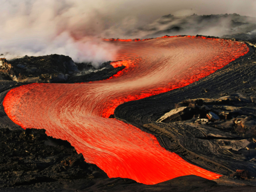

In [13]:
from fastdownload import download_url
dest = 'lava.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

# zgva

Searching for 'sea photos'


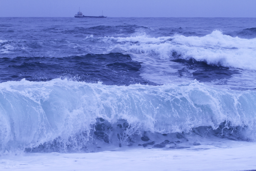

In [14]:
download_url(search_images('sea photos', max_images=1)[0], 'sea.jpg', show_progress=False)
Image.open('sea.jpg').to_thumb(256,256)

# sxvadasxva tipis suratebis gadmowera

In [15]:
searches = 'lava','sea'
path = Path('lava_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(5)
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(5)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'lava photo'
Searching for 'lava sun photo'
Searching for 'lava shade photo'
Searching for 'sea photo'
Searching for 'sea sun photo'
Searching for 'sea shade photo'


# chveni modelis gawvrtna

In [16]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

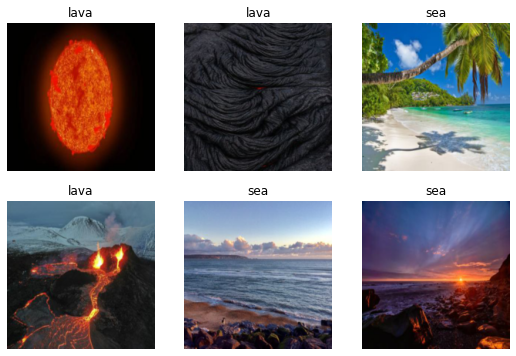

In [17]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [18]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.608679,1.574431,0.529412,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.332024,0.179623,0.088235,00:25
1,0.207195,0.065152,0.029412,00:25
2,0.146422,0.065726,0.029412,00:25


In [19]:
#my model
is_lava,_,probs = learn.predict(PILImage.create('lava.jpg'))
print(f"This is a: {is_lava}.")
print(f"Probability it's a lava: {probs[0]:.4f}")

This is a: lava.
Probability it's a lava: 1.0000


In [20]:
from fastai.vision.all import *

In [21]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224))

In [22]:
path = untar_data(URLs.PASCAL_2007)
path.ls()

(#8) [Path('/root/.fastai/data/pascal_2007/test.json'),Path('/root/.fastai/data/pascal_2007/train.csv'),Path('/root/.fastai/data/pascal_2007/test'),Path('/root/.fastai/data/pascal_2007/valid.json'),Path('/root/.fastai/data/pascal_2007/train'),Path('/root/.fastai/data/pascal_2007/test.csv'),Path('/root/.fastai/data/pascal_2007/segmentation'),Path('/root/.fastai/data/pascal_2007/train.json')]

In [23]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [24]:
dls = ImageDataLoaders.from_df(df, path, folder='train', valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

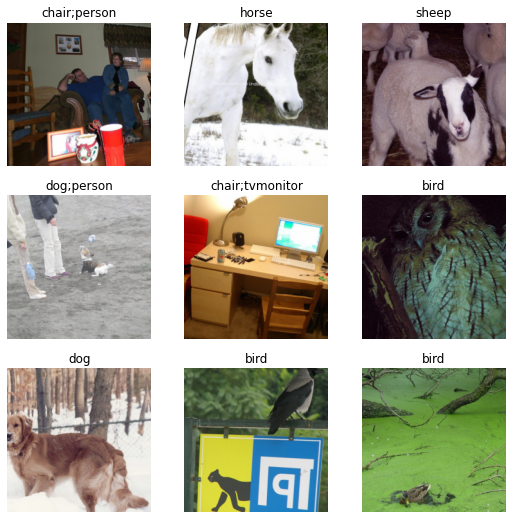

In [25]:
dls.show_batch()

In [26]:
dls = pets.dataloaders(untar_data(URLs.PETS)/"images")

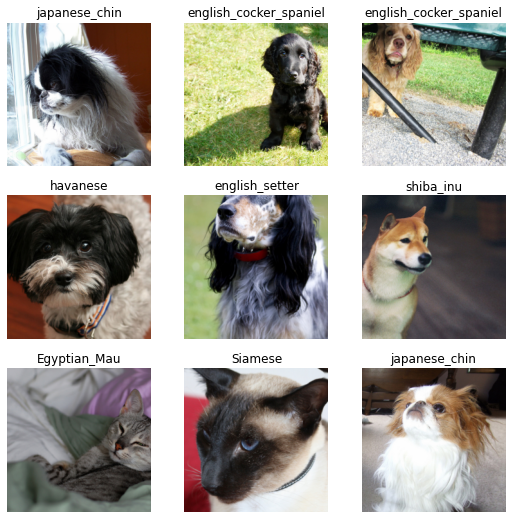

In [27]:
dls.show_batch(max_n=9)